## Moore-Penrose Pseudoinverse

Using Matrix inversion we can calculate $w$ (unknowns) in the equation $y = Xw$ 
- If $X^{-1}$ exists (we can calculate for square matrix only) 
    - $y = Xw$ can also be written as $Xw = y$
    - $X^{-1} Xw = X^{-1}y$
    - $I_n w = X^{-1}y$
    - $w = X^{-1}y$

For non square matrix, which is common in ML data sets we can use pseudoinverse:
- Would be unusual to have exactly as many cases (n) - rows as that of features (m) - columns
- With psudoinverse $X^+$, we can now estimate model weights w even if $n ≠ m$:
    - $w = X^+ y$

- If $X$ is overdetermined ($n > m$), $X^+$ provides $Xy$ as close to $w$ as possible (euclidean distance $|| Xy - w ||_2$)
- If $X$ is underdetermined ($n < m$), $X^+$ provides $w = X^+ y$ solution that has the smallest Euclidean norm $||x||_2$ from all possible solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # eg: doseage of a drug for Alzheimers disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # eg: Patients' forgetfulness score for Alzheimers disease


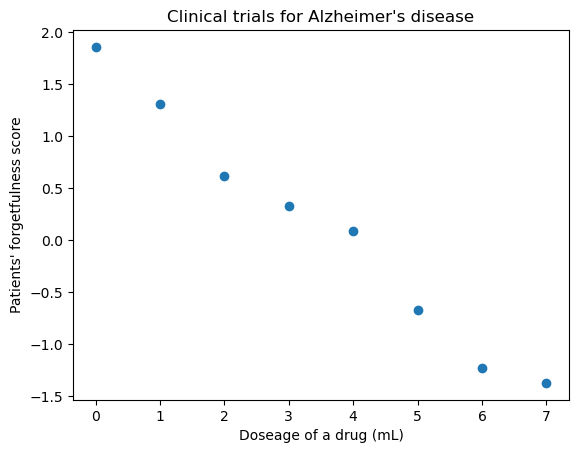

In [4]:
title = "Clinical trials for Alzheimer's disease"
xlabel = "Doseage of a drug (mL)"
ylabel = "Patients' forgetfulness score"
fig, ax = plt.subplots()
ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.scatter(x1, y)
plt.show()

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to `1` across the board:

In [5]:
x0 = np.ones(len(x1))
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
# Concatinate x0 and x1 into a matrix X
X = np.column_stack((x0, x1))
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

We know we can calculate the weights using $w = X^+y$

In [7]:
w = np.dot(np.linalg.pinv(X), y)
w

array([ 1.76      , -0.46928571])

In [ ]:
# first weight corresponds to the y-intercept typically denoted as b
b = w.reshape(-1)[0]
b

np.float64(1.7599999999999996)

In [9]:
# the second weight corresponds to the slope typically denoted as m
m = w.reshape(-1)[1]
m

np.float64(-0.46928571428571436)

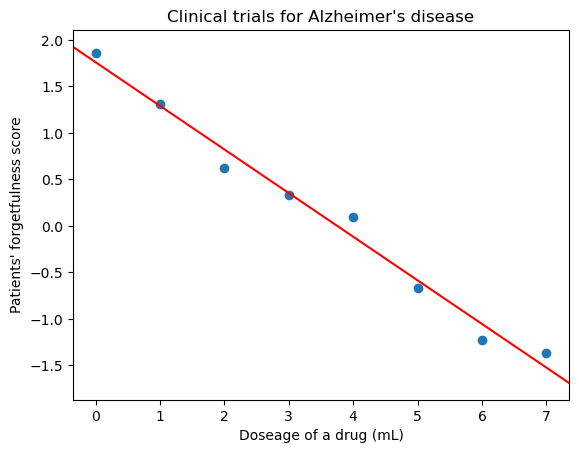

In [13]:
# with the intercept and slope we can plot the regression line
fig, ax = plt.subplots()
ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()

y_min, y_max = m * x_min + b, m * x_max + b

ax.set_xlim([x_min, x_max])
ax.plot([x_min, x_max], [y_min, y_max], 'r')

plt.show()